In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


![](https://www.unitedregional.org/wp-content/uploads/2016/01/GettyImages-1126117038-768x513.jpg)



    Age : Age of the patient

    Sex : Sex of the patient

    exang: exercise induced angina (1 = yes; 0 = no)

    ca: number of major vessels (0-3)

    cp : Chest Pain type chest pain type
        
    Value 0: typical angina
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: asymptomatic

    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach : maximum heart rate achieved

    target : 0= less chance of heart attack 1= more chance of heart attack


In [2]:
pip install chart_studio

     |████████████████████████████████| 64 kB 292 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")

In [4]:
import plotly.graph_objects as go

In [5]:
df= pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no missing values in the dataset

In [9]:
df.shape

(303, 14)

There 303 records with 14 columns

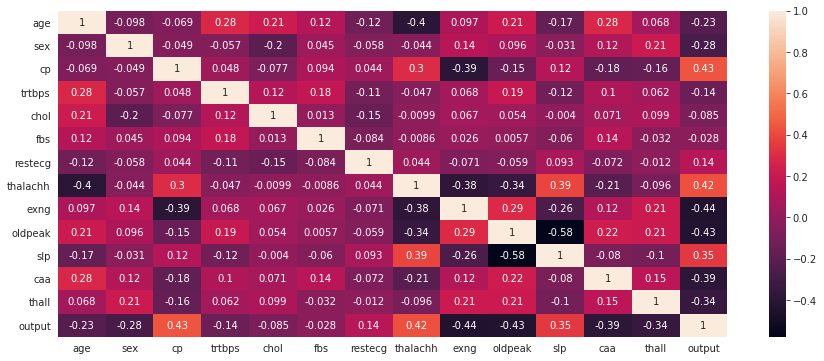

In [10]:
plt.figure(figsize= (15,6))
sns.set_style("darkgrid")
sns.heatmap(df.corr(),annot= True)
plt.show()

Correlation heatmap for different features in the dataset

In [11]:
ax= px.histogram(df,x= "age", template= "plotly_dark",color= "output",title='Age distribution')
ax.show()

The age column is normally distributed with most of the patients ranging in 50 to 65 age also having most chance of heart attack

0= less chance of heart attack 1= more chance of heart attack

In [12]:
ax= px.pie(df, names= "output",template= "plotly_dark",title= "chances of heart attack",hole= 0.5)
ax.show()

Around 54% of the patients in the dataset have chances of heart attack

In [13]:
ax= px.pie(df, names= "sex",template= "plotly_dark",title= "sex",hole=.7)
ax.show()

Distribution of sex shows that 68.3% of patients are of type 1 sex while 31.7% are of type 0

    Chest pain types
    Value 0: typical angina
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: asymptomatic

In [14]:
ax= px.pie(df, names= "cp",template= "plotly_dark",title= " Chest pain types ",hole=.7)
ax.show()

Majority of the patients experience chest pain type 1:typical angina(47.2%) followed by type 2 ie:type non angina pain,only 7% patients are aymptotic(type 3)

In [15]:
ax= px.sunburst(df, names= "cp",path= ["output","cp"],template= "plotly_dark",title= "Chest pain based on heart attack chances")
ax.show()

Patients with higher chances of heart attack majorly have type 2 chest pain followed by type1 and type0
Majority of people having less chance of heart attack experience type 0 chest pain ie typical angina

In [16]:
ax = px.scatter(df, x="age", y="trtbps",size="trtbps", color="output",
                size_max=20,template= "plotly_dark",title="resting blood pressure/age correlation")
ax.show()

trtbps : resting blood pressure (in mm Hg)

Distribution of resting blood pressure and age(scatter plot) with chances of heart attack

In [17]:
ax= px.scatter(df,x= "age",y= "chol",marginal_x='histogram', marginal_y='histogram',size="chol", size_max=20,
              template= "plotly_dark",color= "output",title="age and cholestrol correlation")
ax.show()

chol : cholestoral in mg/dl fetched via BMI sensor

In [18]:
ax = px.scatter_3d(df, x="age", y="trtbps", z="chol",template= "plotly_dark",color="output")
ax.show()

3d scatter plot showing correlation between age,cholestrol and blood pressure also additional dimension is added based on output(chance of heart attack)

In [19]:
ax= px.treemap(df,path= ["fbs","output"],template= "plotly_dark",color= "output",title="blood sugar treemap")
ax.show()

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

The treemap shows most patients having blood sugar less than 120mg/dl having greater chances of heart attack

In [20]:
fig = px.histogram(df, x='thalachh', color="output",title= "maximum heart rate achieved",template= "plotly_dark")
fig.show()

thalach : maximum heart rate achieved

Distribution based on maximum heart rate and chances of heart attack

In [21]:
ax= px.sunburst(df,path= ["output","caa"],template= "plotly_dark",title= "No of major blood vessels based on heart attack chances")
ax.show()

Patients having higher chance of heart attack have  majority of no blood vessels

**ClASSIFICATION PART**

In [22]:
#importing essential libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

All the values in the dataset are numerical hence no need of label encoding

Lets check variance in th features

In [23]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trtbps       307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalachh     524.646406
exng           0.220707
oldpeak        1.348095
slp            0.379735
caa            1.045724
thall          0.374883
output         0.248836
dtype: float64

The age ,trtbps,chol,thalach  have higher levels of variance hence needs to be normalized      

In [24]:
#Using log transformation
df["age"]= np.log(df.age)

In [25]:
df["trtbps"]= np.log(df.trtbps)
df["chol"]= np.log(df.chol)
df["thalachh"]= np.log(df.thalachh)

In [26]:
df.var()

age         0.030655
sex         0.217166
cp          1.065132
trtbps      0.016950
chol        0.041538
fbs         0.126877
restecg     0.276528
thalachh    0.027143
exng        0.220707
oldpeak     1.348095
slp         0.379735
caa         1.045724
thall       0.374883
output      0.248836
dtype: float64

all features are now normally distributed

In [27]:
px.box(df,template= "plotly_dark")

In [28]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.980989,0.683168,0.966997,4.871396,5.485514,0.148515,0.528053,4.995456,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.175087,0.466011,1.032052,0.130191,0.203808,0.356198,0.525860,0.164753,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,3.367296,0.000000,0.000000,4.543295,4.836282,0.000000,0.000000,4.262680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.860674,0.000000,0.000000,4.787492,5.351858,0.000000,0.000000,4.894094,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,4.007333,1.000000,1.000000,4.867534,5.480639,0.000000,1.000000,5.030438,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,4.110874,1.000000,2.000000,4.941642,5.614950,0.000000,1.000000,5.111988,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,4.343805,1.000000,3.000000,5.298317,6.335054,1.000000,2.000000,5.308268,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# ****KNN classification with basic model tuning

In [29]:
#train test split
label= df["output"]
train= df.drop("output",axis= 1)


In [57]:
x_train,x_test,y_train,y_test= train_test_split(train,label,test_size= 0.25,random_state= 5)

In [58]:
scores= []
for i in range(1,50):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train,y_train)
    scores.append(accuracy_score(y_test,knn.predict(x_test)))

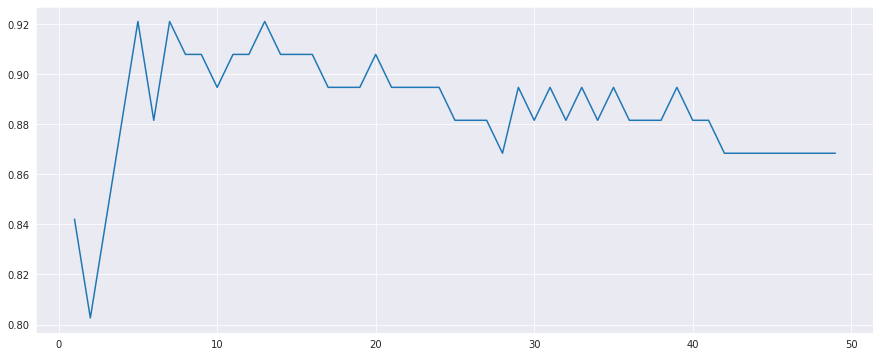

In [59]:
plt.figure(figsize= (15,6))
sns.lineplot(np.arange(1,50),scores)
plt.show()

The n_neighbors values of 13 gives the best prediction score 

In [65]:
knn= KNeighborsClassifier(n_neighbors= 13)
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
accuracy_score(y_test,knnpred)

0.9210526315789473

The accuracy score is 0.92(92%)

<AxesSubplot:>

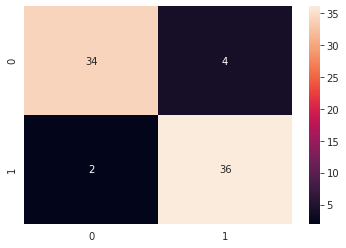

In [66]:
#confusion matrix
cm= confusion_matrix(y_test,knnpred)
sns.heatmap(cm,annot= True)

In [67]:
#classification report
cr= classification_report(y_test,knnpred)
cr


'              precision    recall  f1-score   support\n\n           0       0.94      0.89      0.92        38\n           1       0.90      0.95      0.92        38\n\n    accuracy                           0.92        76\n   macro avg       0.92      0.92      0.92        76\nweighted avg       0.92      0.92      0.92        76\n'

# ****LOGISTIC REGRESSION

In [68]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lrpred= lr.predict(x_test)
accuracy_score(y_test,lrpred)


0.8947368421052632

accuracy score (logistic regression): 0.8852459016393442

<AxesSubplot:>

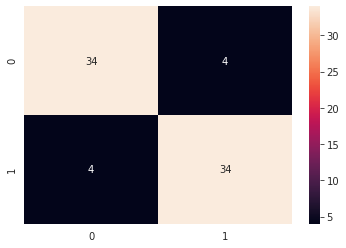

In [69]:
#confusion matrix
cm= confusion_matrix(y_test,lrpred)
sns.heatmap(cm,annot= True)

In [70]:
#classification report
classification_report(y_test,lrpred)


'              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89        38\n           1       0.89      0.89      0.89        38\n\n    accuracy                           0.89        76\n   macro avg       0.89      0.89      0.89        76\nweighted avg       0.89      0.89      0.89        76\n'

# ****RANDOM FOREST CLASSIFIER

In [71]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred= rf.predict(x_test)
accuracy_score(y_test,rfpred)

0.8947368421052632

accuracy score for random forest: 0.8947368421052632

In [73]:
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc= dc.predict(x_test)
accuracy_score(y_test,preddc)

0.7631578947368421

accuracy score for decision tree classifier: 0.7631578947368421

In [74]:
#parameter tuning
dc= DecisionTreeClassifier()
params= {'criterion':['gini','entropy'],'max_depth':[1,3,10,50,100,200]}
grid = GridSearchCV(dc,params, cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 10, 50, 100, 200]})

In [75]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 100}

In [76]:
grid.best_score_

0.7229951690821257

# AdaBoostClassifier****

In [77]:

ad=AdaBoostClassifier(learning_rate= 0.2,n_estimators= 100)
ad.fit(x_train,y_train)
adpred= ad.predict(x_test)
accuracy_score(y_test,adpred)

0.8552631578947368

accuracy score for adaboost : 0.8552631578947368

# GradientBoostingClassifier****

In [78]:
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb= gb.predict(x_test)
accuracy_score(y_test,predgb)

0.8947368421052632

accuracy score for gradientboost :0.8947368421052632

# XGBOOST****

In [79]:
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
accuracy_score(y_test,xgb.predict(x_test))

[11:45:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8552631578947368

accuracy score for xgboost: 0.8552631578947368

# **conclusion: KNN model gave best result with a accuracy score of 0.9210526315789473(92%)**